In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import random as rand
import math

In [3]:
def plot(X, Y, n):
#    plt.figure(figsize = (5,2))
    plt.hist(X, bins = 15, alpha = 0.5, label = "Stabe distribution")
    plt.hist(Y, bins = 15, alpha = 0.5, label = "Series representation")
    plt.title("Series representation with n = %.i" %n)
    plt.legend()
    plt.show()

# a-stable distribution

In [18]:
n = 1000
mean = 1

O = uniform.rvs(size = n, loc = - np.pi / 2, scale = np.pi)
U = uniform.rvs(size = n)
W = - mean * np.log(1 - U)

In [19]:
def stable_0(O, W, alpha, beta):
    if alpha == 1:
        Z = 2 / np.pi * ((np.pi / 2 + beta * O) * np.tan(O) - beta * np.log(np.pi / 2 * W * np.cos(O) / (np.pi / 2 + beta * O)))
    else:
        O_0 = np.arctan(beta * np.tan(np.pi * alpha / 2)) / alpha
        Z = np.sin(alpha * (O_0 + O)) / (np.cos(alpha * O_0) * np.cos(O))**(1/alpha) * ((np.cos(alpha * O_0 + (alpha - 1) * O)) / W)**((1-alpha)/alpha)
    return Z

In [22]:
alpha = 1.5
beta = 0

St = stable_0(O, W, alpha, beta)

In [34]:
def stable(Z, alpha, beta, mu, sigma):
    if alpha == 1:
        X = sigma * (Z - beta * np.tan(np.pi * alpha / 2)) + mu
    else:
        X = sigma * Z + mu
    return Z

In [42]:
math.gamma(1.5)

0.886226925452758

In [45]:
c = 2 * np.sin(np.pi * alpha / 2) * math.gamma(alpha) / np.pi

sigma = (c**(-1) * W.mean()**alpha)**(1/alpha)
mu = 0
X = stable(St, alpha, beta, mu, sigma)

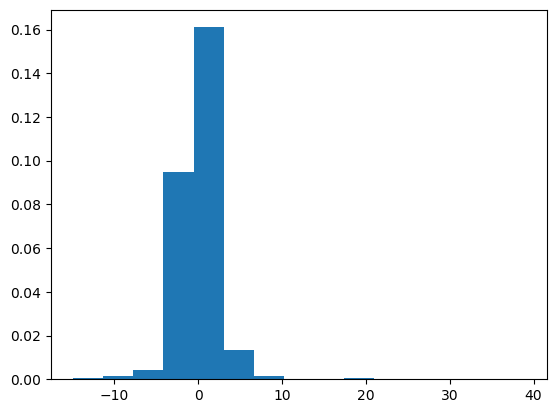

In [51]:
plt.hist(X, bins = 15, density = True)
plt.show()

In [8]:
#n = 1000
#alpha = 1

In [26]:
eps = rand.choices([-1, 1], k = n)

In [27]:
E = np.random.exponential(1, n)

In [28]:
Gamma = []
for i in range(1, n+1):
    Gamma.append(sum(E[: i]))

In [29]:
W = uniform.rvs(size = n, loc = -1670/2, scale = 1670)

In [30]:
Z = eps * np.power(Gamma, -1/alpha) * W

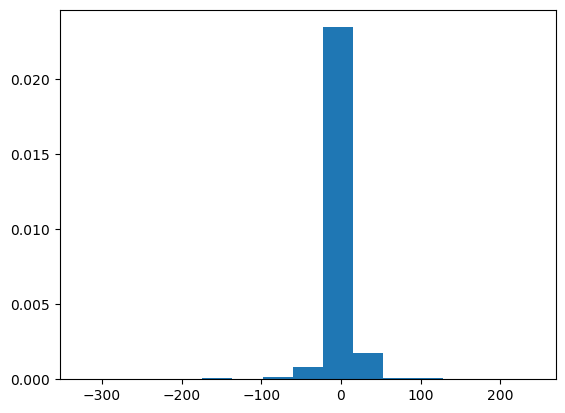

In [49]:
plt.hist(Z, density = True, bins = 15)
plt.show()

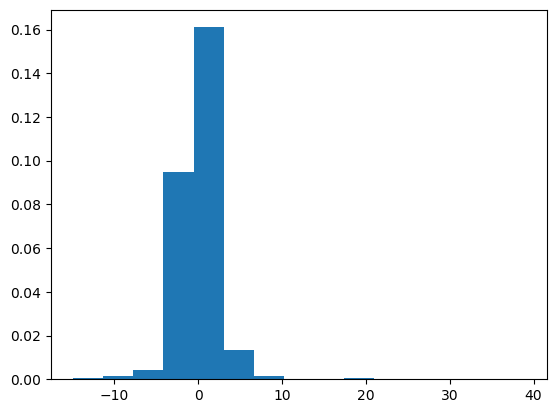

In [39]:
plt.hist(St, density = True, bins = 15)
plt.show()